## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# The `solutions_univ.py` is a Python fSile available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. S

## About the Dataset
In this workspace, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.sample(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
370,371,bagon,3,0.6,42.1,60,dragon,NaN,45,75,60,50,40,30
461,462,magnezone,4,1.2,180.0,241,electric,steel,70,70,115,60,130,90
381,382,kyogre,3,4.5,352.0,302,water,NaN,100,100,90,90,150,140
313,314,illumise,3,0.6,17.7,151,bug,NaN,65,47,75,85,73,85
680,681,aegislash,6,1.7,53.0,234,steel,ghost,60,50,150,60,50,150
109,110,weezing,1,1.2,9.5,172,poison,NaN,65,90,120,60,85,70
494,495,snivy,5,0.6,8.1,62,grass,NaN,45,45,55,63,45,55
603,604,eelektross,5,2.1,80.5,232,electric,NaN,85,115,80,50,105,80
19,20,raticate,1,0.7,18.5,145,normal,NaN,55,81,60,97,50,70
434,435,skuntank,4,1.0,38.0,168,poison,dark,103,93,67,84,71,61


### **TO DO Task 1** 
1. Explore the `pokemon` dataframe, and try to understand the significance of each of its column.
2. There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [3]:
# YOUR CODE HERE

In [4]:
pokemon.id.duplicated().sum()

0

In [5]:
value = pokemon.generation_id.value_counts()
value

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

**Countplot**

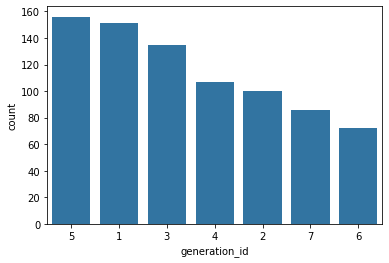

In [6]:
orders = pokemon.generation_id.value_counts().index.values

mono = sb.color_palette()[0]

sb.countplot(data = pokemon, x = 'generation_id', color = mono, order = orders);

`Value_counts 없이 곧바로 칼럼명을 대입하여 차트 완성`

**Barplot**

In [1]:
sb.barplot(x = orders, y = value, color = mono, order = orders)

NameError: name 'sb' is not defined

`Value_counts 로 정리(summary)한 후 좌표값에 대입`

### Expected Output: TO DO Task 1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**

### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**



The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [8]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [9]:
# YOUR CODE HERE

In [10]:
name = pkmn_types.type_level.value_counts().index

In [11]:
value = pkmn_types.type_level.value_counts().values

In [12]:
mono = sb.color_palette()[0]

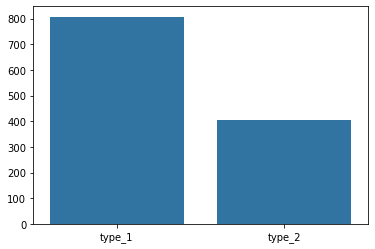

In [13]:
sb.barplot(x = name, y = value, color = mono);

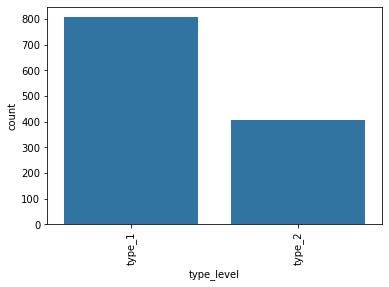

In [14]:
sb.countplot(data = pkmn_types, x = 'type_level', color = mono)
plt.xticks(rotation = 90);

2. Your task is to use this dataframe to create a _relative frequency_ plot of **the proportion of Pokémon with each type**, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [15]:
# YOUR CODE HERE

In [16]:
pkmn_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1612
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1212 non-null   int64 
 1   species     1212 non-null   object
 2   type_level  1212 non-null   object
 3   type        1212 non-null   object
dtypes: int64(1), object(3)
memory usage: 87.3+ KB


In [17]:
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [18]:
value_count = pkmn_types.groupby(['type']).id.count().sort_values()[::-1]
value_count

type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: id, dtype: int64

In [19]:
value_count.sum()

1212

In [20]:
value_prop = value_count / value_count.sum()
value_prop = round(value_prop, 2)
value_prop

type
water       0.11
normal      0.09
flying      0.08
grass       0.08
psychic     0.07
bug         0.06
poison      0.05
ground      0.05
fire        0.05
rock        0.05
fighting    0.04
electric    0.04
steel       0.04
fairy       0.04
dark        0.04
dragon      0.04
ghost       0.04
ice         0.03
Name: id, dtype: float64

In [21]:
value_name = value_prop.index.values
value_name 

array(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'], dtype=object)

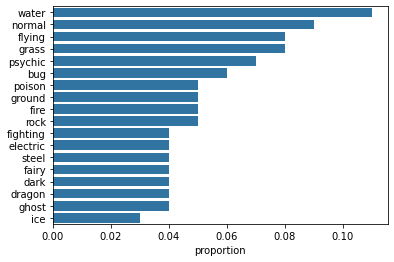

In [22]:
sb.barplot(y = value_name, x = value_prop, color = mono);
plt.xlabel('proportion');

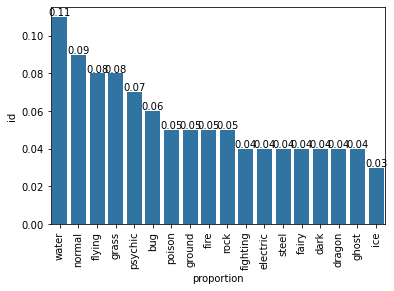

In [23]:
sb.barplot(x = value_name, y = value_prop, color = mono);
plt.xlabel('proportion');
plt.xticks(rotation = 90); 

for i in range(value_name.shape[0]):
    count = value_prop[i]
    plt.text(i, count + 0.005, count, ha = 'center', va = 'top');   # i 다음에 count를 위치시켜야 한다. 

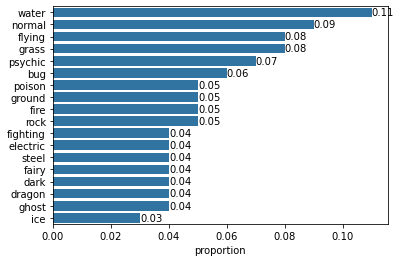

In [24]:
sb.barplot(y = value_name, x = value_prop, color = mono);
plt.xlabel('proportion');

for i in range(value_name.shape[0]):
    count = value_prop[i]
    plt.text(count, i, count, va = 'center');   # count 다음에 i를 위치시켜야 한다. 